# Number of threads speedup analysis

This notebook analyzes how much of an impact using a greater number of threads has in the optimized solutions' cost and energy consumption.

**TODO:**

[ ] get energy consumption

**Other ideas:**

[ ] solution cost vs. evaluation no. (for many nthreads)

[ ] solution energy consumption vs. evaluation no. (for many nthreads)

[ ] speedup with 16 vs 32 threads (vs. evaluation no.)

[ ] compare speedup with energy consumption increase: in the same graph, plot these curves:

* speedup 16-32 threads vs evaluation no.

* energy consumption difference 16-32 threads vs. evaluation no.

### Fetch data

In [8]:
import pandas as pd

df = pd.read_csv('data/threads_speedup_512.csv', skiprows=2, delimiter=';', decimal='.')
df = df.dropna()

df

,nthreads,Run 1,Run 2,Run 3,Run 4,Run 5
0,1,130.90,128.04,128.00,127.98,127.48
3,4,515.29,514.83,514.79,514.47,514.85
7,8,1016.87,1013.47,1013.39,1013.11,1018.36
9,10,1250.62,1251.00,1257.97,1258.30,1258.93
11,12,1492.50,1494.43,1500.79,1492.90,1500.90
15,16,1962.41,1968.02,1967.19,1968.94,1948.13
19,20,1894.60,1895.19,1885.03,1891.98,1893.53
21,22,1861.51,1902.90,1868.20,1902.44,1899.57
23,24,1852.69,1900.31,1896.95,1849.46,1853.69
24,25,1920.69,1930.53,1954.38,1919.98,1921.15


In [9]:
df_melted = pd.melt(df, id_vars=['nthreads'], value_vars=[f'Run {i}' for i in range(1,6)])

df_melted

,nthreads,variable,value
0,1,Run 1,130.90
1,4,Run 1,515.29
2,8,Run 1,1016.87
3,10,Run 1,1250.62
4,12,Run 1,1492.50
...,...,...,...
80,28,Run 5,2059.81
81,29,Run 5,2100.13
82,30,Run 5,2135.05
83,31,Run 5,2157.16


In [10]:
values_1thread = [df_melted[(df_melted['nthreads'] == 1) & (df_melted['variable'] == f'Run {i}')]['value'].values[0] for i in range(1,6)]
base_value = sum(values_1thread)/len(values_1thread)
print(base_value)

df_melted['value_relative'] = df_melted['value'].apply(lambda x: x/base_value)
df_melted

128.48


,nthreads,variable,value,value_relative
0,1,Run 1,130.90,1.018836
1,4,Run 1,515.29,4.010663
2,8,Run 1,1016.87,7.914617
3,10,Run 1,1250.62,9.733966
4,12,Run 1,1492.50,11.616594
...,...,...,...,...
80,28,Run 5,2059.81,16.032145
81,29,Run 5,2100.13,16.345968
82,30,Run 5,2135.05,16.617762
83,31,Run 5,2157.16,16.789851


In [11]:
# do the same for the rest of the data
df_melted_512 = df_melted

df = pd.read_csv('data/threads_speedup_256.csv', skiprows=2, delimiter=';', decimal='.').dropna()
df_melted = pd.melt(df, id_vars=['nthreads'], value_vars=[f'Run {i}' for i in range(1,6)])
values_1thread = [df_melted[(df_melted['nthreads'] == 1) & (df_melted['variable'] == f'Run {i}')]['value'].values[0] for i in range(1,6)]
base_value = sum(values_1thread)/len(values_1thread)
df_melted['value_relative'] = df_melted['value'].apply(lambda x: x/base_value)
df_melted_256 = df_melted

### Plot graphs

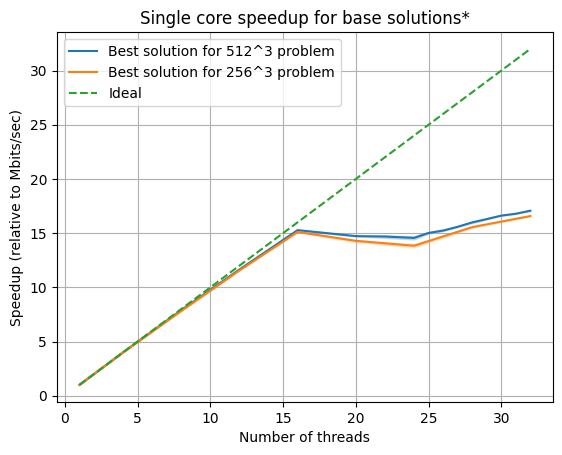

In [12]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.lineplot(data=df_melted_512, x='nthreads', y='value_relative', label='Best solution for 512^3 problem')
sns.lineplot(data=df_melted_256, x='nthreads', y='value_relative', label='Best solution for 256^3 problem')
plt.plot(range(1,32+1), range(1,32+1), '--', label='Ideal') # y = x
plt.legend()
plt.xlabel('Number of threads')
plt.ylabel('Speedup (relative to Mbits/sec)')
plt.title('Single core speedup for base solutions*')
plt.grid()

*Base solutions:
- problem size of 512^3: -O2 avx, threadblocks: 512 4 10, KMP_AFFINITY=balanced
- problem size of 256^3: -O2 avx2, threadblocks: 512 8 8, KMP_AFFINITY=balanced 